In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt

In [10]:
start = 0
end = 2

h = 0.2
k = 10

def f(x, n=52, N=8):
    return 2*sin(pi*x/2) * sqrt(4*(54-n) + N*x**2 * sqrt(23-N))

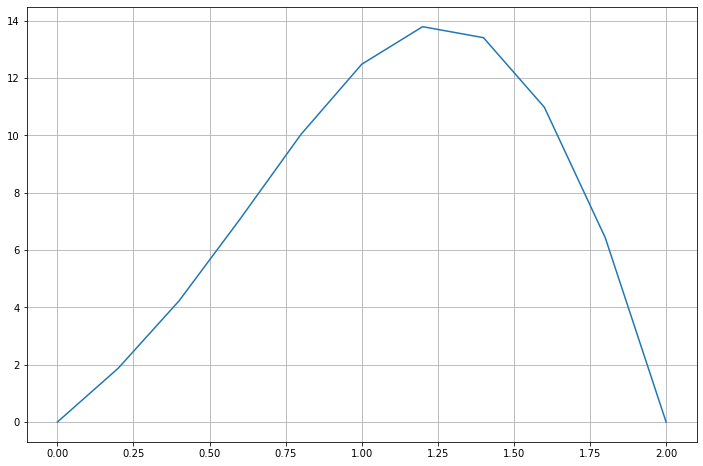

In [11]:
xlist = np.linspace(start, end, k+1)
y = np.array([f(r) for r in xlist])

plt.figure(figsize=(12, 8))
plt.plot(xlist, y)
plt.grid()
plt.show()

In [12]:
# определю значения для a
"""
a = []
for i in range(0, k):
    a.append(y[i])
"""
a = {}
for i in range(1, k+1):
    a[i] = y[i - 1]
np.array(list(a.values())).round(4)

array([ 0.    ,  1.8786,  4.2316,  7.0814, 10.0344, 12.4874, 13.7974,
       13.4139, 10.9851,  6.4343])

In [13]:
"""
g = []
for i in range(0, k - 1):
    g.append((a[i + 1] - a[i])/h)
g
"""
g = {}
for i in range(1, k):
    g[i] = (a[i + 1] - a[i])/h
g

{1: 9.392975367429239,
 2: 11.76518630463254,
 3: 14.248873568166655,
 4: 14.76484659570028,
 5: 12.265179889987996,
 6: 6.550121058053469,
 7: -1.917586119479635,
 8: -12.144312398431865,
 9: -22.75370198445416}

Решу СЛАУ matr $\cdot$ coef = res

In [14]:
res = np.zeros((k,))
res[0] = 0
res[k - 1] = 0

for i in range(1, k-1):
    res[i] = 3 * (g[i + 1] - g[i])

pd.DataFrame(res).T

,0,1,2,3,4,5,6,7,8,9
0,0.0,7.116633,7.451062,1.547919,-7.499,-17.145176,-25.403122,-30.680179,-31.828169,0.0


In [15]:
matr = np.zeros((k, k))
matr[0][0] = 1
matr[k-1][k-1] = 1

for i in range(1, k-1):
    for j in range(0, k):
        if i - 1 == j:
            matr[i][j] = h
        if i == j:
            matr[i][j] = 2 * (h + h)
        if i + 1 == j:
            matr[i][j] = h

pd.DataFrame(matr)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.2,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.2,0.8,0.2,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.2,0.8,0.2,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
c = np.linalg.solve(matr, res)
pd.DataFrame(c).T
di = {}
for i in range(1, k + 1):
    di[i] = c[i-1]
del c
c = di
c

{1: 0.0,
 2: 7.119219422176775,
 3: 7.1062863693424125,
 4: 1.7109440534653035,
 5: -6.210467170199238,
 6: -14.364075958352615,
 7: -22.05911147540821,
 8: -24.4150858030111,
 9: -33.68143949683083,
 10: 0.0}

In [17]:
b = {}
for i in range(1, k):
    b[i] = g[i] - h/3 * (2*c[i] + c[i + 1])
b[k] = b[k-1] + h * (c[k - 1] + c[k])
b

{1: 8.91836073928412,
 2: 10.342204623719475,
 3: 13.187305782023312,
 4: 14.950751866584856,
 5: 14.050847243238069,
 6: 9.935938617527697,
 7: 2.6513011307755328,
 8: -6.643538324908329,
 9: -18.262843384876717,
 10: -24.999131284242885}

In [18]:
d = {}
for i in range(1, k):
    d[i] = 1/(3*h) * (c[i + 1] - c[i])
d[k] = 1/(h**3) * (y[k] - a[k] - b[k]*h - c[k]*h**2)
d

{1: 11.865365703627957,
 2: -0.02155508805727013,
 3: -8.992237193128513,
 4: -13.202352039440902,
 5: -13.589347980255628,
 6: -12.825059195092654,
 7: -3.9266238793381505,
 8: -15.44392282303289,
 9: 56.13573249471805,
 10: -179.31127493404037}

In [32]:
# буду передовать i от 1 до k
def P(i, t, a, b, tau, c, d):
    return a[i] + b[i] * (t - tau[i - 1]) + c[i] * (t - tau[i - 1])**2 + d[i] * (t - tau[i - 1])**3

In [33]:
tau = np.linspace(start, end, k + 1)
teta = np.linspace(start, end, 2 * k + 1)
flist = np.array([f(i) for i in teta])
Plist = np.zeros((2 * k + 1,))

In [34]:
for i in range(1, k + 1):
    Plist[2 * i - 2] = P(i, teta[2 * i - 2], a, b, tau, c, d)
    Plist[2 * i - 1] = P(i, teta[2 * i - 1], a, b, tau, c, d)

pd.DataFrame(Plist)

,0
0,0.000000
1,0.903701
2,1.878595
3,2.983986
4,4.231632
5,5.612434
6,7.081407
7,8.580389
8,10.034376
9,11.363767


In [50]:
df = pd.DataFrame([np.array(flist), np.array(Plist)]).T.round(3)
df.rename(columns={0: 'исходная функция', 1: 'сплайн'}, inplace=True)
df

,исходная функция,сплайн
0,0.000,0.000
1,0.902,0.904
2,1.879,1.879
3,2.982,2.984
4,4.232,4.232
5,5.612,5.612
6,7.081,7.081
7,8.580,8.580
8,10.034,10.034
9,11.364,11.364


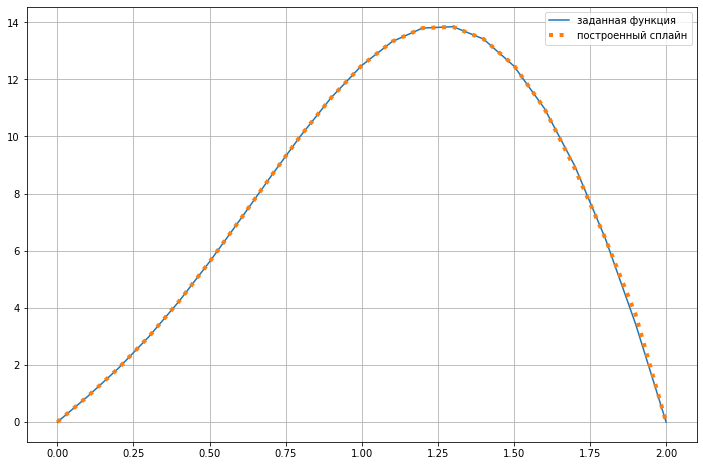

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(teta, flist, label='заданная функция')
plt.plot(teta, Plist, linestyle=':', linewidth=4, label='построенный сплайн')
plt.legend()
plt.grid()
plt.show()

In [52]:
import sympy as sp 
x = sp.symbols('x')
sp.init_printing(use_unicode=True)
dP = sp.diff(2*sp.sin(sp.pi*x/2) * sp.sqrt(4*(54-52) + 8*x**2 * sp.sqrt(23-8)), x)
print("After Differentiation : {}".format(dP))

After Differentiation : 16*sqrt(15)*x*sin(pi*x/2)/sqrt(8*sqrt(15)*x**2 + 8) + pi*sqrt(8*sqrt(15)*x**2 + 8)*cos(pi*x/2)


In [53]:
def df(x):
    return 16*sqrt(15)*x*sin(pi*x/2)/sqrt(8*sqrt(15)*x**2 + 8) + pi*sqrt(8*sqrt(15)*x**2 + 8)*cos(pi*x/2)

def dP(i, t, a, b, tau, c, d):
    return b[i] + 2*c[i] * (t - tau[i - 1]) + 3*d[i] * (t - tau[i - 1])**2

In [54]:
tau = np.linspace(start, end, k + 1)
teta = np.linspace(start, end, 2 * k + 1)
dflist = np.array([df(i) for i in teta])
dPlist = np.zeros((2 * k + 1,))

In [55]:
for i in range(1, k + 1):
    dPlist[2 * i - 2] = dP(i, teta[2 * i - 2], a, b, tau, c, d)
    dPlist[2 * i - 1] = dP(i, teta[2 * i - 1], a, b, tau, c, d)
dPlist[2*k] = dP(k, teta[2*k], a, b, tau, c, d)
pd.DataFrame(dPlist)

,0
0,8.918361
1,9.274322
2,10.342205
3,11.765402
4,13.187306
5,14.338796
6,14.950752
7,14.896870
8,14.050847
9,12.401073


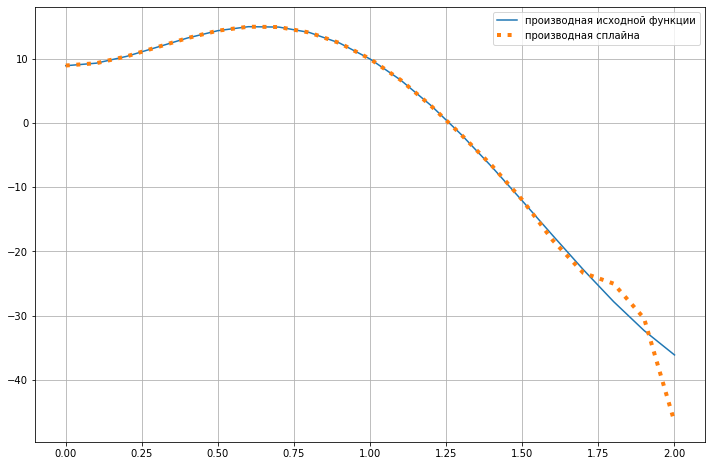

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(teta, dflist, label='производная исходной функции')
plt.plot(teta, dPlist, linestyle=':', linewidth=4, label='производная сплайна')
plt.legend()
plt.grid()
plt.show()

In [57]:
df = pd.DataFrame([np.array(dflist), np.array(dPlist)]).T.round(3)
df.rename(columns={0: 'исходная функция', 1: 'сплайн'}, inplace=True)
df

,исходная функция,сплайн
0,8.886,8.918
1,9.281,9.274
2,10.342,10.342
3,11.764,11.765
4,13.196,13.187
5,14.336,14.339
6,14.955,14.951
7,14.894,14.897
8,14.059,14.051
9,12.402,12.401
